## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

================ Part 1: Feature Normalization ================

In [2]:
print('Loading data ...')
# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,:2]
y = data[:, 2]
y = np.reshape(y, (-1, 1))
m = len(y) 

# Print out some data points
print('First 10 examples from the dataset: ')

for i in range(10):
    print('x = {}, y = {}'.format(X[i, :], y[i, :]))

Loading data ...
First 10 examples from the dataset: 
x = [2104.    3.], y = [399900.]
x = [1600.    3.], y = [329900.]
x = [2400.    3.], y = [369000.]
x = [1416.    2.], y = [232000.]
x = [3000.    4.], y = [539900.]
x = [1985.    4.], y = [299900.]
x = [1534.    3.], y = [314900.]
x = [1427.    3.], y = [198999.]
x = [1380.    3.], y = [212000.]
x = [1494.    3.], y = [242500.]


In [3]:
def featureNormalize(X):
    """
    FEATURENORMALIZE Normalizes the features in X 
    FEATURENORMALIZE(X) returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=1)
    X_norm = (X - mu) / sigma 
    return X_norm, mu, sigma

In [4]:
print('Normalizing Features ...')

Normalizing Features ...


In [5]:
# Scale features and set them to zero mean

X, mu, sigma = featureNormalize(X)

# add intercept term to X
X = np.insert(X, 0, 1, axis=1)

================ Part 2: Gradient Descent ================

In [6]:
def computeCostMulti(X, y, theta):  
    """
    COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    m = len(y) # number of training examples
    inner = np.dot(X, theta) - y
    return ((1/(2*m)) * np.dot(inner.T, inner)).item()

In [7]:
def gradientDescentMulti(X, y, theta, alpha, iters):
    """
    GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    
    m = len(y) # number of training examples
    J_history = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y) )
        
        # Save the cost J in every iteration    
        J_history[i] = computeCostMulti(X,y, theta)
        
    return theta, J_history

In [8]:
print('Running gradient descent ...')

Running gradient descent ...


Text(0,0.5,'Cost J')

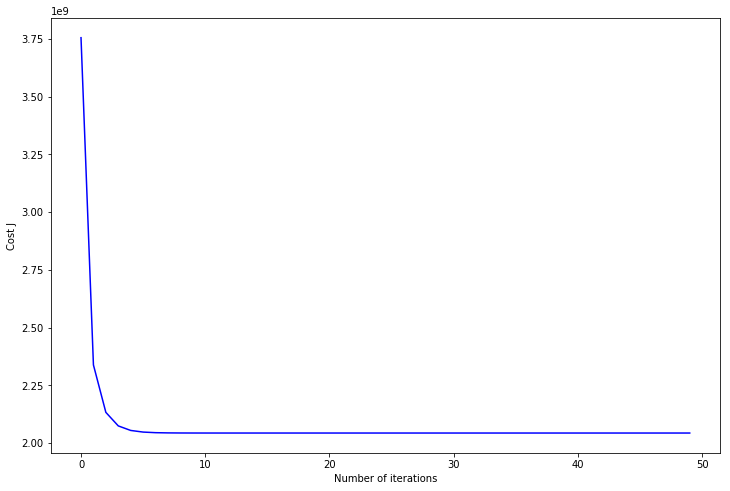

In [9]:
# Choose some alpha value
alpha = 0.9
num_iters = 50

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(num_iters), J_history, 'blue')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

In [10]:
# Display gradient descent's result
print('Theta computed from gradient descent: ', *theta.ravel(), sep='\n')

Theta computed from gradient descent: 
340412.6595744681
110631.05027752834
-6649.4742695020495


In [11]:
# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.
X = (np.array([1650,  3], ndmin=2) - mu) / sigma
X_pred = np.insert(X, 0, 1, axis=1)
price = np.dot(X_pred, theta).item()

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): \n$',price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 
$ 293081.4643351829


================ Part 3: Normal Equations ================

In [12]:
def normalEqn(X, y):
    """
    NORMALEQN Computes the closed-form solution to linear regression 
    NORMALEQN(X,y) computes the closed-form solution to linear 
    regression using the normal equations.
    """
    
    return np.linalg.solve( np.dot(X.T, X), np.dot(X.T, y) )

In [13]:
print('Solving with normal equations...')
# Load Data
X = data[:, :2]
y = data[:, 2]
y = np.reshape(y, (-1, 1))
m = len(y)

# Add intercept term to X
X = np.insert(X, 0, 1, axis=1)

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: ', *theta.ravel(), sep='\n')

Solving with normal equations...
Theta computed from the normal equations: 
89597.90954279766
139.21067401762556
-8738.019112327902


In [14]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot( np.array([1, 1650, 3], ndmin=2), theta).item()

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): \n$', price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 
$ 293081.46433489607
